In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [4]:
file_path = "/content/Bank-Customer-Attrition-Insights-Data (1).csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Display basic information
print(df.info())

# Display the first 5 rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
# Selecting key numerical columns
numerical_cols = ["CreditScore", "Balance", "Point Earned"]

# Computing summary statistics
summary_stats = df[numerical_cols].agg(["mean", "median", "std"]).T
summary_stats["skewness"] = df[numerical_cols].apply(skew)
summary_stats["kurtosis"] = df[numerical_cols].apply(kurtosis)

# Display summary statistics
print(summary_stats)


                      mean    median           std  skewness  kurtosis
CreditScore     650.528800    652.00     96.653299 -0.071596 -0.426113
Balance       76485.889288  97198.54  62397.405202 -0.141088 -1.489267
Point Earned    606.515100    605.00    225.924839  0.008343 -1.193784


<ipython-input-6-0d7ab9142b2a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_dist.index, y=gender_dist.values, ax=axes[0], palette="coolwarm")
<ipython-input-6-0d7ab9142b2a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geography_dist.index, y=geography_dist.values, ax=axes[1], palette="viridis")


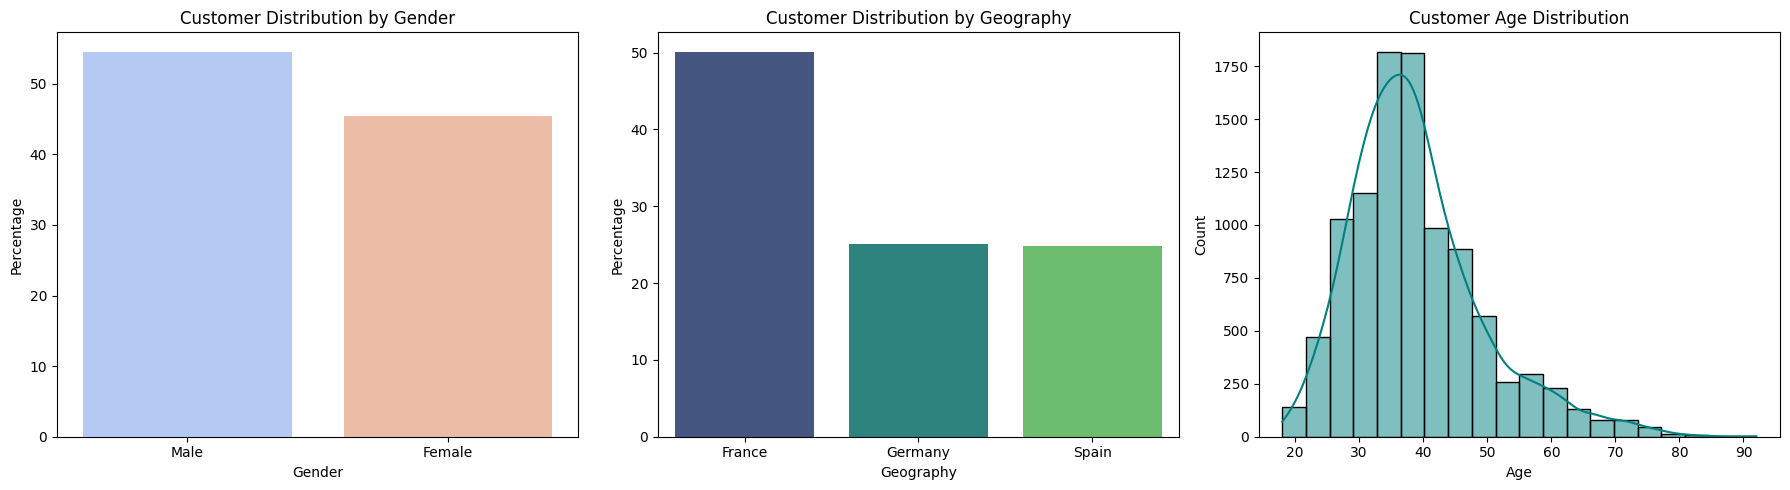

In [6]:
# Calculate distributions
gender_dist = df["Gender"].value_counts(normalize=True) * 100
geography_dist = df["Geography"].value_counts(normalize=True) * 100
age_dist = df["Age"]

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender distribution
sns.barplot(x=gender_dist.index, y=gender_dist.values, ax=axes[0], palette="coolwarm")
axes[0].set_title("Customer Distribution by Gender")
axes[0].set_ylabel("Percentage")

# Geography distribution
sns.barplot(x=geography_dist.index, y=geography_dist.values, ax=axes[1], palette="viridis")
axes[1].set_title("Customer Distribution by Geography")
axes[1].set_ylabel("Percentage")

# Age distribution
sns.histplot(age_dist, bins=20, kde=True, ax=axes[2], color="teal")
axes[2].set_title("Customer Age Distribution")
axes[2].set_xlabel("Age")

plt.tight_layout()
plt.show()


In [7]:
# Group by active membership status
active_stats = df.groupby("IsActiveMember")["Point Earned"].agg(["min", "max", "mean"])

# Rename index for clarity
active_stats.index = ["Inactive", "Active"]

# Display results
print(active_stats)


          min   max        mean
Inactive  119  1000  607.675397
Active    206  1000  605.422831


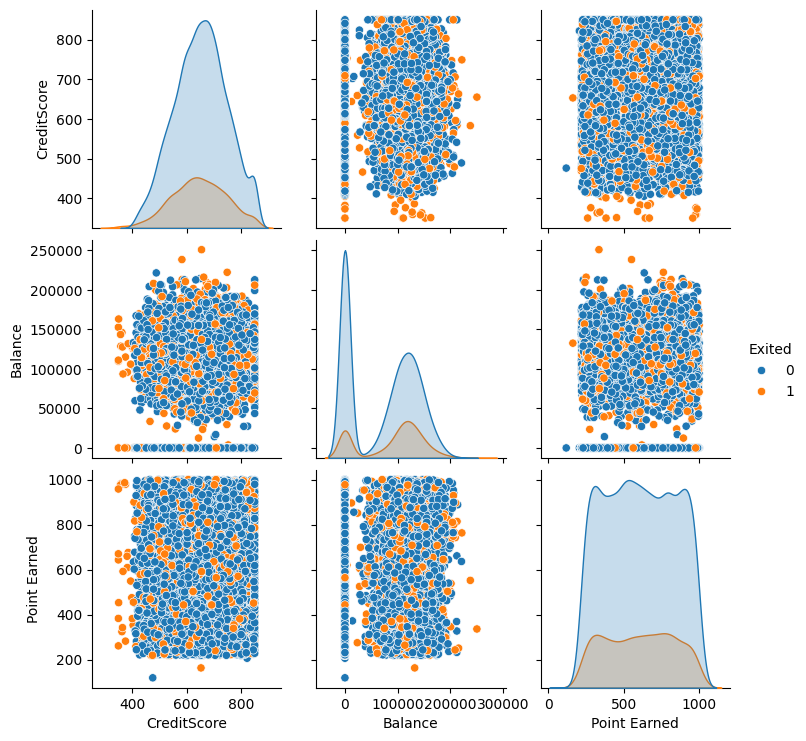

In [8]:
# Pairplot to analyze relationships
sns.pairplot(df, vars=["CreditScore", "Balance", "Point Earned"], hue="Exited")
plt.show()


<ipython-input-9-0281e68ee1db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="Balance", data=df, palette="coolwarm")


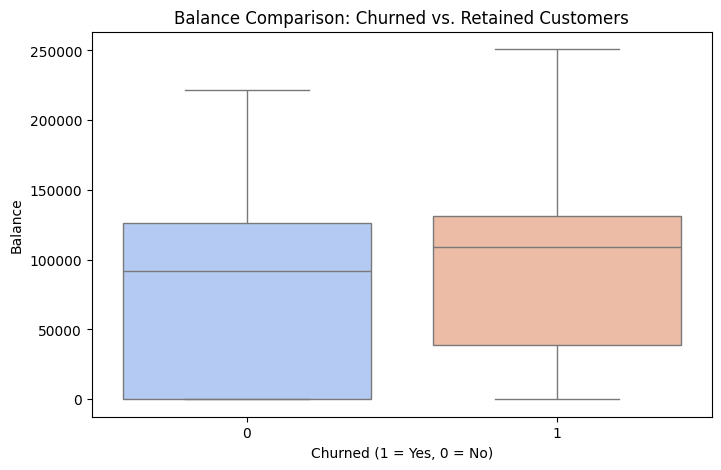

<ipython-input-9-0281e68ee1db>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="Point Earned", data=df, palette="viridis")


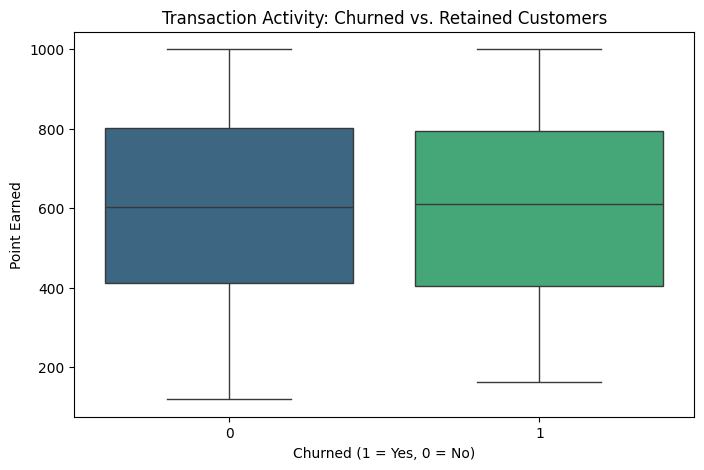

In [9]:
# Boxplot for balance comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Balance", data=df, palette="coolwarm")
plt.title("Balance Comparison: Churned vs. Retained Customers")
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("Balance")
plt.show()

# Boxplot for transaction count comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Point Earned", data=df, palette="viridis")
plt.title("Transaction Activity: Churned vs. Retained Customers")
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("Point Earned")
plt.show()


In [10]:
# Define conditions
low_credit = df["CreditScore"] < 580  # Example threshold for low credit score
high_balance = df["Balance"] > df["Balance"].median()  # Above median balance

# Compute probability
prob_low_credit_high_balance = (df[low_credit & high_balance].shape[0]) / df.shape[0]

# Display result
print(f"Probability of a customer having both low credit score and high balance: {prob_low_credit_high_balance:.4f}")


Probability of a customer having both low credit score and high balance: 0.1177
